In [42]:
import pyodbc
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from matplotlib import cm

conn = pyodbc.connect(
    "Driver={SQL Server Native Client 11.0};"
    "Server=DESKTOP-DMHEOJV;"
    "Database=Caltrans_Research;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()

# sql_query = '''SELECT * FROM Caltrans_Research.dbo.data'''

# df = pd.read_sql(sql_query, conn)
df = pd.read_sql('''SELECT * FROM Caltrans_Research.dbo.data''', conn)
df

c:\Users\Whata\anaconda3\envs\Caltrans_Research\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Row,Col,Latitude,Longitude,Concentration
0,A,3,33.965913,-117.348340,4642.000000
1,A,10,33.965898,-117.348240,2737.500000
2,A,20,33.965935,-117.348186,1759.000000
3,A,50,33.965893,-117.347847,594.000000
4,A,100,33.965906,-117.347289,188.500000
5,A,150,33.965917,-117.346767,110.000000
6,A,200,33.965896,-117.346220,86.000000
7,B,3,33.963506,-117.348342,4058.000000
8,B,10,33.963508,-117.348276,1433.333333
9,B,20,33.963538,-117.348185,1568.000000


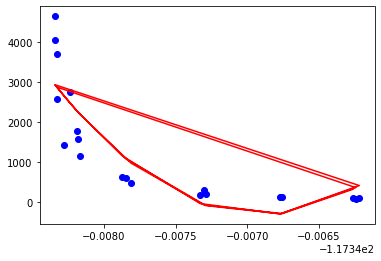

In [43]:
x, y = df['Longitude'].values, df['Concentration'].values

x = x.reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)
reg = LinearRegression()
reg.fit(x_poly, y)
y_pred = reg.predict(x_poly)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')